### Задание

#### 1.Получите данные и загрузите их в рабочую среду.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Загрузим датасет fetch_california_housing
real_estate = fetch_california_housing()

In [3]:
# Составим датафрейм из необходимых данных
data = pd.DataFrame(real_estate.data, columns=real_estate.feature_names)

# Добавим столбец с целевой переменной
data['MedHouseValue'] = real_estate.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### 2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

In [4]:
data.isna().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

#### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [5]:
X = data.iloc[:, :-1]
y = data['MedHouseValue']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [7]:
model = LinearRegression()

In [8]:
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [10]:
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print('RMSE train:', rmse_train)
print('RMSE test:', rmse_test)

RMSE train: 0.7196757085831575
RMSE test: 0.7455813830127761


In [11]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('R2 train:', r2_train)
print('R2 test:', r2_test)

R2 train: 0.6125511913966952
R2 test: 0.5757877060324511


В целях дальнейшего упрощения работы, запишем функцию, для выполнения пунктов 3 и 4.

In [12]:
def metric_counting(data, model=LinearRegression(), test_size=0.2, random_state=42):
    X = data.iloc[:, :-1]
    y = data['MedHouseValue']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    model = model
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print('RMSE train:', rmse_train)
    print('RMSE test:', rmse_test)
    print()
    print('R2 train:', r2_train)
    print('R2 test:', r2_test)

#### 5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

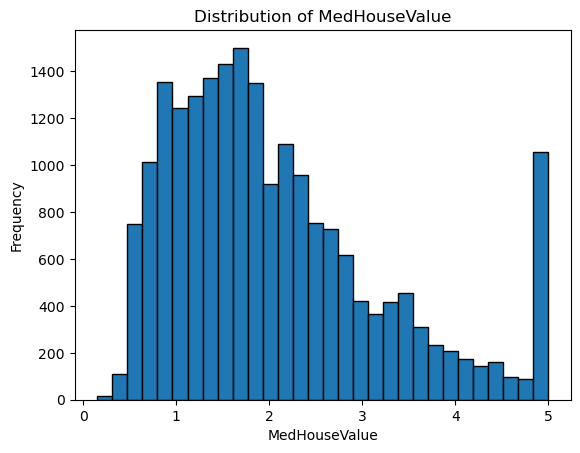

In [13]:
plt.hist(y, bins=30, edgecolor='black')
plt.xlabel('MedHouseValue')
plt.ylabel('Frequency')
plt.title('Distribution of MedHouseValue')
plt.show()

Видим явный выброс для целевой переменной в значении "5". Кроме того, "5" является наибольшим (предельным) значением для данного признака.

#### 6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

In [14]:
# Вычисление корреляционной матрицы
correlation_matrix = X.corr()

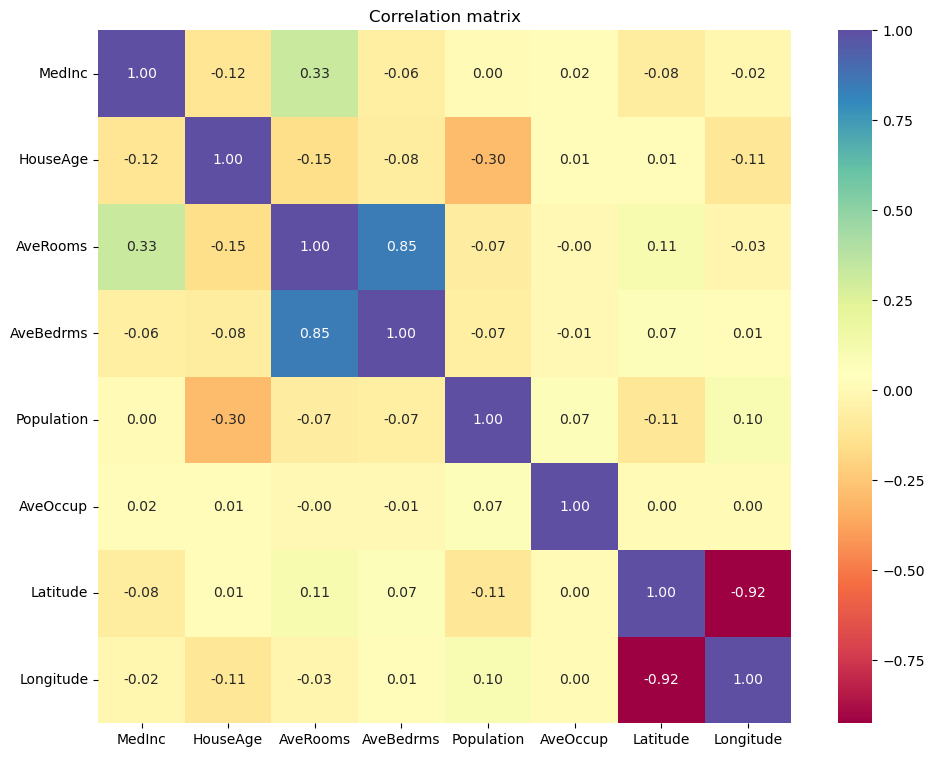

In [15]:
# Построение тепловой карты корреляционной матрицы
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt='.2f', square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.title('Correlation matrix')
plt.show()

##### a. Сделайте выводы.

Из полученной матрицы корреляции можем выделить пары признаков, между которыми наблюдается сильная корреляция: `AveBedrms - AveRooms` и `Longitude - Latitude`. Попробуем удалить признак `AveBedrms`, чтобы избежать мультиколлинеарности.

##### b. Удалите признаки на основании полученных значений, выводов.

In [16]:
data_first_mod = data.drop(['AveBedrms'], axis=1)

In [17]:
data_first_mod.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422


##### c. Повторите п. 3, п. 4 на измененных данных.

In [18]:
metric_counting(data_first_mod)

RMSE train: 0.7316746485880745
RMSE test: 0.7398151789804083

R2 train: 0.5995238502055928
R2 test: 0.5823239094526445


####  7. Исследуйте оставленные признаки на выбросы.

In [19]:
data_second_mod = data_first_mod.copy()

In [20]:
data_second_mod.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,35682.000000,1243.333333,41.950000,-114.310000,5.000010


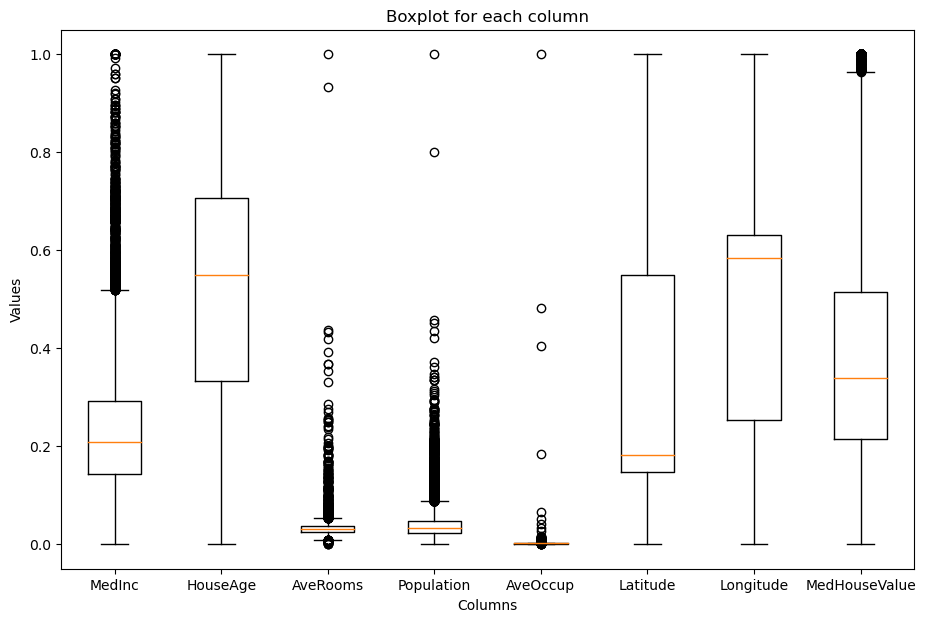

In [21]:
plt.figure(figsize=(11, 7))

# Приведём данные к одному масштабу
data_scaled = (data_second_mod - data_second_mod.min()) / (data_second_mod.max() - data_second_mod.min())

# Построим boxplot для каждого столбца
plt.boxplot(data_scaled.values)
plt.xticks(range(1, len(data_scaled.columns) + 1), data_scaled.columns)

plt.title('Boxplot for each column')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [22]:
features_with_outliers = ['MedInc', 'AveRooms', 'Population', 'AveOccup']

##### a. Удалите выбросы в случае обнаружения.

In [23]:
# Запишем функцию для поиска выбросов через межквартильный размах
def remove_outlier(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_out = df[df[feature].between(lower_bound, upper_bound, inclusive='both')]
    return df_out

In [24]:
for feature in features_with_outliers:
    data_second_mod = remove_outlier(data_second_mod, feature)

##### b. Повторите п. 3, п. 4 на измененных данных.

In [25]:
metric_counting(data_second_mod)

RMSE train: 0.6610299227496499
RMSE test: 0.6682884986543767

R2 train: 0.6236572448199893
R2 test: 0.6227130683101156


#### 8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.

In [26]:
data_third_mod = data_second_mod.copy()

In [27]:
# Выполним преобразование признака "AveOccup" с помощью логарифмирования
data_third_mod['AveOccup'] = np.log(data_third_mod['AveOccup'])

# Выполним преобразование признака "AveRooms" с помощью извлечения квадратного корня
data_third_mod['AveRooms'] = np.sqrt(data_third_mod['AveRooms'])

# Выполним преобразование признака "MedInc" с помощью возведения в квадрат
data_third_mod['MedInc'] = np.square(data_third_mod['MedInc'])

##### a. Повторите п. 3, п. 4 на измененных данных.

In [28]:
metric_counting(data_third_mod)

RMSE train: 0.6542877061741172
RMSE test: 0.6586338813593554

R2 train: 0.6312951570200278
R2 test: 0.6335354879803332


#### 9. Сформулируйте выводы по проделанной работе.

Преобразование данных может иметь как положительное, так и отрицательное влияние на качество модели. Для достижения наилучшего результата необходимо экспериментировать и использовать различные преобразования.  
В ходе выполнения работы, удалось на каждом из этапов добиться улучшения метрик RMSE и R2 модели линейной регрессии путём работы с данными.